In [ ]:
using Pkg, Revise
Pkg.activate("../GenLinAlgProblems/")
using GenLinAlgProblems, LinearAlgebra, Latexify

using PyCall
itikz=pyimport("itikz")
nM   = pyimport("itikz.nicematrix")
jinja=pyimport("jinja2");

<div style="float:center;width:100%;text-align:center;">
<strong style="height:100px;color:darkred;font-size:40px;">Basis and Dimension</strong><br>
    <strong style="height:100px;color:darkred;font-size:30px;">The Fundamental Theorem (Part I)</strong>
</div>

In [11]:
html"<iframe width=\"400\" height=\"200\" src=\"https://www.youtube.com/embed/OEDoJ5OaL5A\"  frameborder=\"0\" allow=\"accelerometer; clipboard-write; encrypted-media; gyroscope; picture-in-picture\" allowfullscreen></iframe>"

HTML{String}("<iframe width=\"400\" height=\"200\" src=\"https://www.youtube.com/embed/OEDoJ5OaL5A\"  frameborder=\"0\" allow=\"accelerometer; clipboard-write; encrypted-media; gyroscope; picture-in-picture\" allowfullscreen></iframe>")

# 1. Basis for a Vector Space

## 1.1 Motivating Example

### 1.1.1 Row Echelon Form of $A$

Let us use the same matrix we saw in the Linear Independence notebook.<br>
This time, we will augment it by $I$, which will turn out useful in one of the examples below.

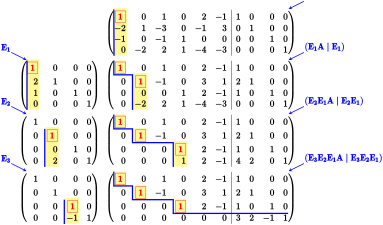

In [3]:
A  = [ 1 0 1 0 2 -1; -2 1 -3 0 -1 3; -1 0 -1 1 0 0; 0 -2 2 1 -4 -3 ]
pb = ShowGe{Rational{Int}}( A,  Matrix(1I(size(A,1))); tmp_dir="../tmp")
ref!(pb, gj=false)
show_layout!(pb, show_variables=false, array_names=["E", ["A", "I"]])

This is the same matrix we saw in the Linear Independence notebook.

It has the **reduced row echelon form** $R = E_3 E_2 E_1 A$ as repeated below.<br>
(Note that I chose the reduced row echelon form for simplicity, *any row echelon form would do*)

$\qquad
\begin{align}
A &= \left(\begin{array}{rrrrrr}
\ \ 1 & \ 0 & \ 1 &\ 0 &\  2 &  -1 \\
   -2 & \ 1 &  -3 &\ 0 &  -1 &\  3 \\
   -1 & \ 0 &  -1 &\ 1 &\  0 &\  0 \\
\ \ 0 &  -2 & \ 2 &\ 1 &  -4 &  -3 \\
\end{array}\right) \\
& \sim
\left(\begin{array}{rrrrrr}
\;\;\ \color{red}{1} &\;\; 0              &\;\  1 &\ 0              &\;\ 2 &  -1\ \\
\; 0              &\;\; \color{red}{1} &\;  -1 &\ 0              &\;\ 3 &\  1\ \\
\; 0              &\;\; 0              &\;\  0 &\ \color{red}{1} &\;\ 2 &  -1\ \\
\; 0              &\;\; 0              &\;\  0 &\ 0              &\;\ 0 &\  0\
\end{array}\right) = R
\end{align}
$

---
**Preliminary Remarks**
* Each of the columns of $A$ is in the span of the columns.
* Any relationship between the columns in the row reduction of $A$ holds at every level:<br> it has to,
since the scalar multipliers in these relationships are solutions of $A x = 0 \Leftrightarrow E_1 A x = 0 \Leftrightarrow E_2 E_1 A x= 0 \dots$

### 1.1.2 Linearly Independent Columns

#### 1.1.2.1 Removing linearly dependent columns

The row echelon form in our example shows that the columns $v_1, v_2, \dots v_6$ of $A$ are **linearly dependent**.

> Since the reduced row echelon form has a row of zeros, we know **there are vectors $b$
for which the system $A x = b$ is inconsistent**.

Rewriting $A x = b$ in column view

$\qquad
x_1 \begin{pmatrix}\ 1 \\ -2 \\ -1 \\ \ 0 \end{pmatrix} +
x_2 \begin{pmatrix}\ 0 \\\  1 \\\  0 \\ -2 \end{pmatrix} +
x_3 \begin{pmatrix}\ 1 \\ -3 \\ -1 \\ \ 2 \end{pmatrix} +
x_4 \begin{pmatrix}\ 0 \\\  0 \\\  1 \\ \ 1 \end{pmatrix} +
x_5 \begin{pmatrix}\ 2 \\ -1 \\ \ 0 \\ -4 \end{pmatrix} +
x_6 \begin{pmatrix}-1 \\\  3 \\ \ 0 \\ -3 \end{pmatrix} =
b, %\label{eq1}\tag{1}
$

we recognize that the system $A x = b$ has solutions iff $b \in \text{span}\{ v_1, v_2, v_3, v_4, v_5, v_6 \}$, i.e.,
the span of the columns of $A$.

We saw previously that we can make the solution unique by removing the columns $v_3, v_5$ and ${v_6}$ corresponding to the free variables.

**Removing these columns does not change the span**: we still can write $b$ as a linear combination of the remaining
columns $v_1, v_2$ and $v_4$.

The difference is that with the smaller set of linearly independent vectors, there is only one possible solution:<br>
**With the reduced set of vectors

$\qquad
x_1 \begin{pmatrix}\ 1 \\ -2 \\ -1 \\ \ 0 \end{pmatrix} +
x_2 \begin{pmatrix}\ 0 \\\  1 \\\  0 \\ -2 \end{pmatrix} +
x_4 \begin{pmatrix}\ 0 \\\  0 \\\  1 \\ \ 1 \end{pmatrix} =
b, %\label{eq2}\tag{2}
$

has a unique solution for every $b$ in the range of the original problem!**

#### 1.1.2.2 Summary: the reduced system has a unique solution

>To summarize: let $V$ be the span of these vectors:
> * $V$ is a vector space (a subspace of $\mathbb{R}^4$)
> * We can elimintate $v_4, v_5$ and $v_6$ leaving only linearly independendent vectors $v_1, v_2, v_4$<br>
$
\begin{align}
V = & \text{span}\{ v_1, v_2, {\color{red}{v_3}}, v_4, {\color{red}{v_5, v_6}} \} \\
  = & \text{span}\{ v_1, v_2, v_4 \}
\end{align}
$<br>
> * any vector $b \in V$ can be written **uniquely** as a linear combination of the  linearly independent vectors $v_1, v_2, v_4$.

## 1.2 Basis

### 1.2.1 Definition of a Basis

We are led to the following definition, which is carefully worded to allow for any kind of vectors in a vector space.

<div style="background-color:#F2F5A9;color:black;">

**Definition** Let $V$ be a vector space. A set of vectors $\{ v_1, v_2, \dots v_N \} \in V$ is a **basis** for $V$ iff

* $\text{span}\{ v_1, v_2, \dots v_N \} = V$
* the vectors in $\{ v_1, v_2, \dots v_N \}$ are linearly independent.
    
The definition is written for a finite set of vectors. It can be extended to infinite sets,
but this would add some complications that we would like to avoid.
</div>

### 1.2.2 Constructing a Basis from a Given Set of Vectors

Now look at the selection of the linearly independent vectors from the columns of $A$:
* We can start with all the vectors, removing one vector at a time.
    * From the reduced row echelon form, we see that $v_6 = -v_1 + v_2 - v_4$.
      We can delete this vector from the span $V$, since it is already included in $\text{span}\{ v_1, v_2, v_4 \}$.
    * Similarly, the next to last vector $v_5 = 2 v_1 + 3 v_2 + 2 v_4$. It can be deleted for the same reason.
    * In fact, each of the non pivot columns can be expressed as a linear combination of the pivot columns to its left,<br>
    i.e., pivot columns with a column index smaller than the index of the non pivot column under consideration
    * If in addition to removing the non pivot columns we were to remove a pivot column: we lose its pivot entry.
    There is no way any of the other pivot columns can be used in a linear combination to reproduce this vector!

* We can build up a vector at a time.
    * from the reduced row echelon form the first pivot vector is linearly independent: we will keep it.
    * we add pivot vectors one at a time with increasing column index, until we come to the first non-pivot column.<br>
      since we can generate this vector from the pivot columns to the left which we have already included,
      we can safely omit this non-pivot vector.
    * continuing this process, we end up adding one pivot vector at a time, until we have included all the pivot vectors.

---
This idea generalizes to arbitrary vectors:

<div style="background-color:#F2F5A9;color:black;">

* Given a set of vectors, check whether they are linearly dependent.
    * If so, there is a vector in the set that can be expressed
       as a linear combination of the remaining vectors.<br>
       Remove it from the set.
    * We can proceed in this fashion until the remaining vectors are linearly independent.
</div>

<div style="background-color:#F2F5A9;color:black;">

* Given a set of vectors, select a vector:
    * if adding it to a current set of vectors results in a set that is still linearly independent,<br>
    keep it in the current set.
    * if not, omit it.
    * Proceed in this fashion until all the vectors in the original set have been considered.
</div>

## 1.3 Basis and Dimension

### 1.3.1 Definition of the Dimension of a Vector Space

The next observation is that the selection of the pivot columns is not unique:
* look at $\{v_1, v_3 \}$. The row echelon form shows that these two vectors are linearly independent.
Since $v_3 = v_1 - v_2 \Leftrightarrow v_2 = v_1 -v_3$,<br>
we could keep $v_3$ and omit $v_2$ instead
* we could similarly use $v_5$ or $v_6$ instead of $v_4$.

Thus, bases are not unique. We do notice however that we just substituted one basis vector for another:
> the number of vectors in the basis stayed the same!

This is easily proved, and applies to arbitrary vector spaces:<br>
<div style="background-color:#F2F5A9;color:black;">

**Theorem:** Given two bases for a vector space, they have the same number of elements.
    
**Definition**: the **dimension** $dim(V)$ of a vector space $V$ is the number of elements in a basis for that vector space.<br>
</div>

#### Example in $\mathbb{R}^3$:

* The vector space consisting of just the origin has

$\qquad\qquad Z = \left\{ \;\begin{pmatrix} 0\\ 0\\0 \end{pmatrix}\;\right\} \quad \text{has } dim \left( Z \right) = 0
$

* The vector space consisting of a line through the origin, i.e.,

$\qquad\qquad
L = span \left\{ \; \begin{pmatrix}1\\3\\1\end{pmatrix}\;\right\} \quad \text{has } dim \left( L \right) = 1
$

* The vector space consisting of a plane through the origin, i.e.,

$\qquad\qquad
P = span \left\{ \; \begin{pmatrix}1\\3\\1\end{pmatrix}, \begin{pmatrix}0\\1\\1\end{pmatrix}
\;\right\} \quad \text{has } dim \left( P\right) = 2
$

* The vector space consisting of a 3-plane(?) through the origin, i.e.,

$\qquad\qquad
R = span \left\{ \; \begin{pmatrix}1\\3\\1\end{pmatrix}, \begin{pmatrix}0\\1\\1\end{pmatrix}, \begin{pmatrix}1\\0\\3\end{pmatrix}
\;\right\} \quad \text{has } dim \left( R\right) = 3
$

We will show that $R = \mathbb{R}^3$ must be true.

### 1.3.2 The Dimension of $\mathbb{R}^{N}$

Let's look at $\mathbb{R}^n$, the set of vectors with $n$ scalar entries from $\mathbb{R}$.

To determine its dimension, we need to exhibit a basis: we note that for any vector $v \in \mathbb{R}^n$,

$\qquad
\begin{pmatrix} v_1\\v_2\\v_3\\ \dots \\ v_N \end{pmatrix}
= v_1 \begin{pmatrix} \color{red}1\\0\\0\\ \dots \\ 0 \end{pmatrix}
  + v_2 \begin{pmatrix} 0\\\color{red}1\\0\\ \dots \\ 0 \end{pmatrix}
  + v_3 \begin{pmatrix} 0\\0\\\color{red}1\\ \dots \\ 0 \end{pmatrix} + \dots
  + v_n \begin{pmatrix} 0\\0\\0\\ \dots \\ \color{red}1 \end{pmatrix}.
$

The vectors in the expansion are the $n$ columns of $I_{n \times n}$.
* Since we can write any vector $v$ as a linear combination of this set of vectors,
they span $\mathbb{R}^n$.
* Each of the columns of $I$ has a pivot, so these vectors are linearly independent.
We have a basis consisting of $n$ vectors, thus

$\qquad
\text{dim } \mathbb{R}^n = n
$

<div style="background-color:#F2F5A9;color:black;">

**Definition:** The **standard basis** of $\mathbb{R}^n$ is the set of columns of an identity matrix $I$ of size $n \times n$.
</div>

### 1.3.3 Example: The Dimension of a Subspace of $\mathbb{R}^3$

<div style="float:left;"><img src="Figs/CoordinateSystem.svg" width=300/></div>
<div style="float:right;padding-top:1cm;">The dimension of a vector space is not necessarily the same as the number of entries in a vector.

Consider the xy plane in $\mathbb{R}^3$. It is spanned by

$\qquad
\left\{ \; \begin{pmatrix} 1\\0\\0\end{pmatrix},  \begin{pmatrix} 0\\1\\0\end{pmatrix} \; \right\}
$

a set of linearly independent vectors: hence the dimension of the xy-plane in $\mathbb{R}^3$ is 2.
</div>

**Remark:** we can't just decide to drop the third zero entry. To do so requires defining a mapping:<br>
<div style="float:left;">
<div style="float:left;">
Let $\qquad x=\begin{pmatrix} \alpha \\ \beta \\0 \end{pmatrix} =
      \alpha  \begin{pmatrix} 1\\0\\0\end{pmatrix} + \beta \begin{pmatrix} 0\\1\\0\end{pmatrix}.$

<br>
We define the mapping $D(x) = \begin{pmatrix} \alpha \\ \beta \end{pmatrix}$.
</div>
<div style="float:right;padding-left:1cm;">

> The **coordinate vector** $\begin{pmatrix} \alpha \\ \beta \end{pmatrix}$ is a vector in $\mathbb{R}^2$.<br>
Note that this mapping is invertible<br>(the domain is the xy plane in $\mathbb{R}^3$, the range is the xy plane in $\mathbb{R}^2$).
</div></div>

**Remark:** To associate a vector $\begin{pmatrix} \alpha \\ \beta  \end{pmatrix}$ with a vector
$\alpha \hat{i} + \beta \hat{j}$ similarly requires the definition of such a mapping.

**Remark:** In the absence of further information, the vector $\begin{pmatrix}1\\0\end{pmatrix}$ refers to **the first basis vector**.
<br>It need not represent $\hat{i}$, but instead represent the first vector in a basis $\{ sin(x), cos(x) \}$!

### 1.3.4 The Dimension of a Subspace of the Vector Space of Functions

Consider $\mathscr{U} = \left\{ w(x) \mid w(x) = \alpha (x^2+1)+\beta (x^2-1) + \gamma (x+1) + \delta ( x-1),
\text{ for any } \alpha,\beta,\gamma,\delta \in \mathbb{R}, \text{ and } -\infty < x < \infty
                        \right\}$
                        
This is a subspace of the vector space of functions $\mathscr{F}(-\infty,\infty)$.<br>
To find a basis for $\mathscr{U}$, we need to obtain the largest possible set of linearly independent functions
of the vectors defining the span of $\mathscr{U}$.

This example is simple enough to do by inspection:
* Observe that the functions $p_0(x) = 1, p_1(x)=x$ and $p_2(x) = x^2$ are in $\mathscr{U}$ since

$\qquad
\left. \begin{align}
p_0(x) =& \frac{1}{2} \left( (x^2+1) - (x^2-1) \right) \\
p_1(x) =& \frac{1}{2} \left( (x+1) - (x-1) \right) \\
p_2(x) =&  \frac{1}{2}\left( (x^2+1) - (x^2-1) \right)
\end{align}
\right\}
\Leftrightarrow
\begin{cases}
x^2+1 = p_0(x) + p_2(x) \\
x^2-1 = -p_0(x)+p_2(x)\\
x+1   = p_0(x)+p_1(x)\\
x-1   = -p_0(x)+p_1(x)
\end{cases}
$

Therefore

$\qquad
\begin{align}
\mathscr{U} =& span\{ \; x^2+1, x^2-1, x+1, x-1 \; \} & \\
            =& span\{ \; p_0(x), p_1(x), p_2(x), x^2+1, x^2-1, x+1, x-1 \; \}  & \text{ adding vectors known to be in } \mathscr{U}\\
            =& span\{  p_0(x), p_1(x), p_2(x), p_0(x) + p_2(x), -p_0(x)+p_2(x), p_0(x)+p_1(x), p_0(x)-p_1(x) \} & \\
            =& span\{  p_0(x), p_1(x), p_2(x) \} & \text{ dropping linear combinations}.
\end{align}
$

Since the functions  $p_0(x) = 1, p_1(x)=x$ and $p_2(x) = x^2$ are known to be linearly independent,
they form a basis for $\mathscr{U}$, and hence

$\qquad
dim \mathscr{U} = 3.
$

### 1.3.5 Some Simple but Useful Theorems to Keep in Mind:

<div style="background-color:#F2F5A9;color:black;">
    
**Theorem** If $U$ is a subspace of $V$, then $dim U \le dim V.$
    
**Theorem** Given a set $\left\{ v_1, v_2, \dots v_N \right\}$ of $N$ vectors in a vector space $V$ of known $dim V = N$.
* If the set of vectors is linearly independent, it must span $V$, and therefore be a basis for $V$.
* If the set of vectors spans $V$, the vectors must be linearly independent and therefore be a basis for $V$.
</div>

#### Example:

Consider the following subspace in $\mathbb{R}^3$:

$\qquad P = span\left\{\;
\begin{pmatrix} 1\\2\\1 \end{pmatrix}, \begin{pmatrix}2\\1\\0 \end{pmatrix},
\begin{pmatrix}0\\2\\1\end{pmatrix}
\;\right\}
$

Since there are 3 vectors in the span, and since $dim\ \mathbb{R}^3 = 3$,
we have the right number of vectors for a basis.

To show that they do indeed form a basis, we only need to show one of the two defining properties of a basis:
* show that the vectors are linearly independent, or
* show that the vectors span $\mathbb{R}^3$

# 2. Subspaces Associated with a Matrix

## 2.1 Definitions

Given a matrix $A$ of size $M \times N$, we can easily construct 4 important subspaces (there are many more!)
<div style="background-color:#F2F5A9;color:black;">

**Definition:** The **column space** of $A$, written $\mathscr{C}(A)$ is the span of the columns of $A$, i.e.,

   $\qquad\mathscr{C}(A) = \{ w \in \mathbb{R}^M \mid w = A x \text{ for any vector } x\}$
</div>

Note this is the **range** of the function $y = A x$.

<div style="background-color:#F2F5A9;color:black;">

**Definition:** The **row space** of $A$, written $\mathscr{R}(A)$ is the span of the rows of $A$, i.e,

   $\qquad\mathscr{R}(A) = \{ w \in \mathbb{R}^N \mid w = A^t y \text{ for any vector } y\}$
</div>

<div style="background-color:#F2F5A9;color:black;">

**Definition:** The **null space** of $A$, written $\mathscr{N}(A)$ is the set of homogeneous solutions of $A x = 0$, i.e.,

$\qquad\mathscr{N}(A) = \{ x \in \mathbb{R}^N \mid A x = 0 \}$
</div>

<div style="background-color:#F2F5A9;color:black;">

**Definition:** The **null space** of $A^t$, written $\mathscr{N}(A^t)$ is the set of homogeneous solutions of $A^t y = 0$, i.e.,

$\qquad\mathscr{N}(A^t) = \{ y \in \mathbb{R}^M \mid A^t y = 0 \}$
</div>

----
<p style="font-size:20pt;text-align:center;color:blue;">The Fundamental Subspaces</p>
<div style="float:left;"><img src="Figs/FundamentalTheorem_0.svg" width=400/></div>
<div style="float:left;padding-left:3cm;padding-top:1cm;">
Example: a $M\times N =2 \times 4$ matrix

$\qquad
    \begin{pmatrix} \alpha_1 & \alpha_2 & \alpha_3 & \alpha_4 \\ \beta_1 & \beta_2 & \beta_3 & \beta_4 \end{pmatrix}\begin{pmatrix}x_1\\x_2\\x_3\\x_4\end{pmatrix} = \begin{pmatrix}y_1\\y_2\end{pmatrix}
$

* The rows have 4 entries: the same as the x vector
* The columns have 2 entries: the same as the y vector
* The (right) null space $\mathscr{N}(A)$ are solutions $x$ of $A x = 0$:<br> the same as the x vector, 4 entries
* The (left) nullspace $\mathscr{N}(A^t)$ are solutions $y$ of $A^t y = 0 \Leftrightarrow y^t A = 0$:<br> the same as the $y$ vector, 2 entries.

</div>

Bases are easily obtained from a computational layout of the Gaussian elimination, as discussed below.<br>
We repeat the overall result $E A = R$ for easy reference.<br>
(obtained from the first and last layer in the computational layout) 

## 2.2 A Basis for $\mathscr{C}(A)$

Gaussian Elimination: $E A = R$

$\qquad
\begin{align}
\begin{pmatrix}A & I \end{pmatrix} &= \left(\begin{array}{rrrrrr|rrrr}
\ \ 1 & \ 0 & \ 1 &\ 0 &\  2 &  -1 & \;\;\ 1& \;\;\ 0&\;\;\ 0&\;\;\ 0 \\
   -2 & \ 1 &  -3 &\ 0 &  -1 &\  3 & 0&1&0&0 \\
   -1 & \ 0 &  -1 &\ 1 &\  0 &\  0 & 0&0&1&0 \\
\ \ 0 &  -2 & \ 2 &\ 1 &  -4 &  -3 & 0&0&0&1 \\
\end{array}\right) \\
& \sim
\left(\begin{array}{rrrrrr|rrrr}
\;\;\ \color{red}{1} &\;\; 0              &\;\  1 &\ 0              &\;\ 2 &  -1\ &\;\;\ 1 & \;\;\ 0 & 0 & \;\;\ 0 \\
\; 0              &\;\; \color{red}{1} &\;  -1 &\ 0              &\;\ 3 &\  1\   & 2 & 1 & 0 & 0 \\
\; 0              &\;\; 0              &\;\  0 &\ \color{red}{1} &\;\ 2 &  -1\   & 1 & 0 & 1 & 0 \\
\; 0              &\;\; 0              &\;\  0 &\ 0              &\;\ 0 &\  0\   & 3 & 2 & -1 & 1 \\
\end{array}\right) = \begin{pmatrix}R & E \end{pmatrix}
\end{align}
$

The column space is the set of all vectors $b$ in Eq(1).
To obtain a basis, we need to select
a largest possible linearly independent subset of the columns of $A$:
><strong> The pivot columns in $A$ form a basis for $\mathscr{C}(A)$</strong>

For our current example, this basis is given by:

$\qquad
\text{basis for } \mathscr{C}(A) :\quad \left\{ \;
\left(\begin{array}{r}\ 1 \\ -2 \\ -1 \\ \ 0 \end{array}\right),
\begin{pmatrix}\ 0 \\\  1 \\\  0 \\ -2 \end{pmatrix},
\begin{pmatrix}\ 0 \\\  0 \\\  1 \\ \ 1 \end{pmatrix}
\; \right\}
$

**Remarks**:
* the dimension of this subspace is the number of pivots we found with GE.
* Since the vectors in Eq(1) can be reordered, the number of pivots must remain unchanged
  if the columns of $A$ were reordered: the order of the variables in $A x = b$ leaves the number of pivots unchanged.

## 2.3 A Basis for $\mathscr{R}(A)$

The end result for a basis for $\mathscr{R}(A)$ is just as simple as the basis for the $\mathscr{C}(A)$,<br> but requires some discussion first.

Looking at $E A = R \Leftrightarrow A = E^{-1} R$, we see that $R$ has a row of zeros:<br>
**we can reconstruct all the rows of $A$ from the non-zero rows in $R$**<br>
using the corresponding columns in $E^{-1}$:

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:15pt;\">E⁻¹ R = A</p>\n</div>")

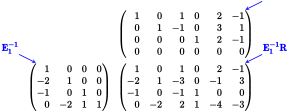

In [33]:
A  = [ 1 0 1 0 2 -1; -2 1 -3 0 -1 3; -1 0 -1 1 0 0; 0 -2 2 1 -4 -3 ]
I4 = Matrix(1I,4,4)
v1=A[:,1]; v2=A[:,2]; v3=A[:,3]; v4=A[:,4]; v5=A[:,5]; v6=A[:,6]
A0 = [A I4]

E1=[ 1 0 0 0;  2 1 0 0;  1 0 1 0; 0 0  0 1]; A1=E1*A0
E2=[ 1 0 0 0;  0 1 0 0;  0 0 1 0; 0 2  0 1]; A2=E2*A1
E3=[ 1 0 0 0;  0 1 0 0;  0 0 1 0; 0 0 -1 1]; A3=E3*A2

R=A3[:,1:6]; E=A3[:,7:end]; Einv = Int.(inv(E)) # the example has an inverse consisting of integers only

matrices = [[ :none, R ], [ Einv, A] ]

pr( "E⁻¹ R = A", sz=15, height=15)
h,_ = nM.ge( matrices, array_names=["E^{-1}", "R"]  )
h

In $A = E^{-1} R$, we can remove the zero row(s) of $R$ and the corresponding column(s) of $E^{-1}.$<br>
We see that **we can reconstruct all the rows of $A$ as linear combinations of the pivot rows or $R$.**<br>
For example, denoting the non-zero rows of $R$ as $R_1, R_2, R_3$, we see that the last row of $A$ is $-2 R_2 + R_3$.

We conclude that **any linear combination of the rows of $A$ can be expressed as a linear combination of the pivot rows**<br>
(i.e., non-zero rows of $R$).

Note that we can also see which rows of $A$ yield the non-zero rows of $R$:<br>
if we delete the zero row(s) in $R$, and hence the corresponding column(s) of $E^{-1}$<br>
as well as the last row of $A$, we obtain

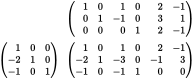

In [40]:
matrices = [[ :none, R[1:3,: ]], [ Einv[1:3,1:3], A[1:3,:] ]]

h,_ = nM.ge( matrices )
h

Since the reduced matrix derived from $E^{-1}$ is invertible,
we see that for this example,
> the non-zero rows of $R$ are obtained by linear combination of the first three rows of $A$.

**Remark:** the pivot columns of the non-zero rows in $R$ form a triangular matrix:<br>
$\quad\;$**these rows are linearly independent by construction!**

> We conclude that **the pivot rows of a row echelon form** of $A$ form a basis for $\mathscr{R}(A)$.<br>
If we wish to pick a basis from $A$, an additional argument involving $E$ is required.<br>
Alternatively, we could do more work by looking at the pivot columns in $A^t$.

For our current example, this basis is

$\qquad
\text{basis for } \mathscr{R}(A) : \quad \left\{ \;
\left(\begin{array}{r}1\\0\\1\\0\\2\\-1 \end{array}\right),
\left(\begin{array}{r}0\\1\\-1\\0\\3\\1 \end{array}\right),
\left(\begin{array}{r}0\\0\\0\\1\\2\\-1 \end{array}\right) \; \right\}
$

**Remarks**:
* The dimension of this subspace is the number of pivots we found with GE.
* Since $\mathscr{R}(A) = \mathscr{C}(A^t)$, the dimension of $\mathscr{C}(A^t)$ is the number of pivots found for $A$:<br>
   $A$ and $A^t$ have the same number of pivots

<div style="background-color:#F2F5A9;color:black;">

**Definition:** The rank of a matrix $A$ denoted $rank(A)$ is the number of pivots obtained by Gaussian elimintation.

**Theorem:** $dim \mathscr{C}(A) = dim \mathscr{R}(A) = rank(A)$,<br>
$\quad$ and therefore $dim \mathscr{C}(A^t) = dim \mathscr{R}(A^t) = rank(A)$
</div>

## 2.4 A Basis for $\mathscr{N}\ (A)$

Since the null space of $A$ is the set of homogeneous solutions, we need to solve $A x_H = 0$. For our example problem, this solution is

$\qquad
x_H = \alpha \left(\begin{array}{r}-1 \\ 1 \\ \color{red}{1} \\ 0 \\ \color{red}{0} \\ \color{red}{0} \end{array}\right)
  + \beta   \left(\begin{array}{r}-2 \\-3 \\ \color{red}{0} \\-2 \\ \color{red}{1} \\ \color{red}{0} \end{array}\right)
  + \gamma  \left(\begin{array}{r} 1 \\-1 \\ \color{red}{0} \\ 1 \\ \color{red}{0} \\ \color{red}{1} \end{array}\right)
$

By construction, these vectors contain a submatrix $I$ corresponding to the free variables. These vectors are therefore linearly independent.

> We conclude that the **constant vectors from the homogeneous solution** form a basis for $\mathscr{N}(A)$

For our example, this basis is

$\qquad
\text{basis for } \mathscr{N}(A) : \quad
\left\{ \; \left(\begin{array}{r}-1 \\ 1 \\ 1 \\ 0 \\ 0 \\ 0 \end{array}\right),
           \left(\begin{array}{r}-2 \\-3 \\ 0 \\-2 \\ 1 \\ 0 \end{array}\right),
           \left(\begin{array}{r} 1 \\-1 \\ 0 \\ 1 \\ 0 \\ 1 \end{array}\right) \; \right\}
$

**Remark:** the dimension of this subspace is the number of free variables, i.e. $N- rank(A)$.

<div style="background-color:#F2F5A9;color:black;">

**Theorem:** Given matrix $A$ of size $M \times N$, then $dim \mathscr{C}(A) + dim \mathscr{N}(A) = N$.
</div>
(The number of basic variables and the number of free variables add up to the number of columns).

## 2.5 A Basis for $\mathscr{N}\ (A^t)$

The theorem relating the dimension of the column space<br>
to the dimension of the nullspace of a matrix $A$ of size $M \times N$<br>
applies to the matrix $A^t$ of size $N \times M$:

<div style="background-color:#F2F5A9;color:black;">

**Theorem:** Given matrix $A$ of size $M \times N$, then  $dim \mathscr{R}(A) + dim \mathscr{N}(A^t) = M$.
</div>
We need $M - rank(A)$ linearly independent solutions of $A^t y = 0 \Leftrightarrow y^t A = 0$.

Looking at our example problem, we see that $E A = R$.

In particular, the non-pivot rows of $E$ correspond to the zero rows of $R$:<br>
There are $M - rank(A)$ such rows.

Since $E$ is an invertible matrix, these rows must be linearly independent.<br>
Since the number of these vectors equals $dim \mathscr{N}(A^t)$, they form a basis for $\mathscr{N}(A^t)$.

> We conclude that the **non-zero rows of the matrix** $E$ form a basis for $\mathscr{N}(A^t)$

$\qquad\quad$ For our example, this basis is

$\qquad\qquad\quad
\text{basis for } \mathscr{N}(A^t) : \quad
\left\{ \; \left(\begin{array}{r} 3 \\ 2 \\ -1 \\ 1 \end{array}\right) \; \right\}
$

# 3. The Fundamental Theorem of Linear Algebra (Part 1)

## 3.1 The Theorem

<div style="background-color:#F2F5A9;color:black;">

**Summary (Fundamental Theorem of Linear Algebra (Part I)**<br>
Let $A$ of size $M \times N$ have $rank(A) = r$ (the number of pivots in $A$),<br>
    and let Gaussian elimination result in
    $E A = R$,<br>
    where $E$ is an invertible matrix and $R$ is a row echelon form of $A$.
<div style="float:left;"><img src="Figs/FundamentalTheorem.svg" width=300/></div>
<div style="float:left;padding-left:3cm;">

| Space            | Subspace                 | Basis            | Subspace Dimension          |
|------------------|--------------------------|------------------|--------------------|
| $\mathbb{R}^N$  | $\mathscr{R}(A)$         | pivot rows of $\color{red}R$ | $rank(A)$ |
| $\mathbb{R}^N$  | $\mathscr{N}(A)$         | homogeneous solution of $A x = 0$ | $N - rank(A)$ |
| $\mathbb{R}^M$  | $\mathscr{C}(A)$         | pivot cols of $\color{red}A$ | $rank(A)$ |
| $\mathbb{R}^M$  | $\mathscr{N}(A^t)$       | homogeneous solutions of $A^t x=0$ | $M - rank(A)$ |

$$\begin{align}
\; dim\ \mathscr{C}(A) &\ + dim\ \mathscr{N}(A) &= N \\
\;\;dim\ \mathscr{R}(A) &\ + dim\ \mathscr{N}(A^t) &= M \\
\end{align}
$$
$$
dim\ \mathscr{C}(A) = dim\ \mathscr{R}(A) = rank\ A
$$
</div>
</div>

**Remarks:**
* The sketch of the fundamental theorem suggests that the spaces are distinct.<br>
$\quad$ We will show this is true for many systems of scalars, in particular for $\mathbb{R}$.<br>
$\quad$ It does not hold for $\mathbb{Z}_2$ (modulo 2 arithmetic), which is important in digital transmission applications.
* Part 2 of the theorem will show that a basis of $\mathscr{N}(A^t)$ is given by the non-pivot rows of $E$.<br>
$\quad$ Again, this does not hold for $\mathbb{Z}_2$ (modulo 2 arithmetic) for example.<br>
It does hold however for the vector spaces $\mathbb{R}^N$.

$\quad$ This will be addressed when we discuss the fundamental theorem (part 2).

## 3.2 Examples

### 3.2.1 A matrix of size $1 \times 3$ 

Let $A = ( 1\; 2\;5 )$, so that $A : x\in\mathbb{R}^3 \longrightarrow \mathbb{R}^1$.

Note that $A$ is already in row echelon form, so we can take $R = A$.<br>
Since there is exactly one pivot, the $rank(A) = 1$. 

* The column space is the span of the pivot column of $\color{red}{A}$:
    * $\mathscr{C}(A) = span\{\ ( 1 )\ \}\quad\quad$ (the line $\mathbb{R}^1$).
    * basis for $\mathscr{C}(A) = \{\ ( 1 )\ \}\quad$ (a vector on that line).
    * $dim \mathscr{C}(A) = 1$

* The row space is the span of the pivot row of $\color{red}{R}$:
    * $\mathscr{R}(A) = span\{\ ( 1 \; 2\; 5 )\ \}\quad\quad$ (a line in $\mathbb{R}^3$).
    * basis for $\mathscr{R}(A) = \{\ ( 1\;2\;5 )\ \}\quad$ (a vector on that line).
    * $dim \mathscr{R}(A) = 1$

* The null space is the set of homogeneous solutions.
    * $\mathscr{N}(A) = span \left\{\
                          \left(\begin{array}{r} -2 \\ 1\\ 0 \end{array}\right),
                          \left(\begin{array}{r} -5 \\ 0\\ 1 \end{array}\right)
                        \ \right\}\quad\quad$ (a plane in $\mathbb{R}^3$).
    * basis for $\mathscr{N}(A) = \left\{\
                          \left(\begin{array}{r} -2 \\ 1\\ 0 \end{array}\right),
                          \left(\begin{array}{r} -5 \\ 0\\ 1 \end{array}\right)
                        \ \right\}\quad$ (two vectors in that plane).
    * $dim \mathscr{N}(A) = 2$

* The null space for $\mathscr{N}(A^t)$
    * $\mathscr{N}(A^t) = \{ 0 \}\quad\quad$ (the origin)
    * there is no basis for this space
    * dim $\mathscr{N}(A^t) = 0$

<div style="float:left;"><img src="Figs/FundamentalTheorem_1.svg" width=300/></div>
<div style="float:left;padding-left:3cm;padding-top:1cm;">

| Space            | Subspace                 | Basis            | Subspace Dimension          |
|------------------|--------------------------|------------------|--------------------|
| $\mathbb{R}^3$  | $\mathscr{R}(A)$         | pivot rows of $\color{red}R$ | 1 |
| $\mathbb{R}^3$  | $\mathscr{N}(A)$         | homogeneous solution | $3 - 1 = 2$ |
| $\mathbb{R}^1$  | $\mathscr{C}(A)$         | pivot cols of $\color{red}A$ | $1$ |
| $\mathbb{R}^1$  | $\mathscr{N}(A^t)$       | non-pivot rows of $\color{red}E$ | $1 - 1=0$ |
</div>

### 3.2.2 A matrix of size $3 \times 3$ 

Let $A = \begin{pmatrix} 1 & 2 & 5 \\ 2 & 4 & 8\\1 & 2 & 3 \end{pmatrix} \sim
 \begin{pmatrix} \color{red}1 & 2 & 5 \\ 0 & 0 & \color{red}{-2}\\0 & 0 & 0 \end{pmatrix} = R,\quad\quad E A = R,$ where $E = \begin{pmatrix} 1 & 0 & 0 \\ -2 & 1 & 0\\1 & -1 & 1 \end{pmatrix}.$

There are two pivots, so $rank(A)=2$, and $A : x\in\mathbb{R}^3 \longrightarrow \mathbb{R}^3$.


* The column space is the span of the pivot columns of $\color{red}{A}$:
    * $\mathscr{C}(A) = span\left\{\ \begin{pmatrix}1\\2\\1\end{pmatrix}, \begin{pmatrix}5\\8\\3\end{pmatrix}\ \right\}\quad\quad$ (a plane $\mathbb{R}^3$).
    * basis for $\mathscr{C}(A) = \left\{\  \begin{pmatrix}1\\2\\1\end{pmatrix}, \begin{pmatrix}5\\8\\3\end{pmatrix}\ \right\}\quad$ (a coordinate system of 2 vectors in that plane).
    * $dim \mathscr{C}(A) = 2$

* The row space is the span of the pivot rows of $\color{red}{R}$:
    * $\mathscr{R}(A) = span\left\{\ \begin{pmatrix}1\\2\\5\end{pmatrix},
                                \left(\begin{array}{r} 0\\0\\-2\end{array}\right)
                   \ \right\}\quad\quad$ (a plane in $\mathbb{R}^3$).
    * basis for $\mathscr{R}(A) = \left\{\ \begin{pmatrix}1\\2\\5\end{pmatrix},
                                \left(\begin{array}{r} 0\\0\\-2\end{array}\right)\ \right\}\quad$ (a set of 2 coordinate vectors for this plane).
    * $dim \mathscr{R}(A) = 2$

* The solution set of $A x = 0$ is<br><br>
$\qquad \left\{ x\ \bigg| \ x = \alpha       \begin{pmatrix}-2\\1\\0\end{pmatrix}\ \right\}
   = span\left\{\ \begin{pmatrix}-2\\1\\0\end{pmatrix}\ \right\}.$<br><br>
  The null space is therefore given by<br><br>
  * $\mathscr{N}(A) = span \left\{\ 
                          \left(\begin{array}{r} -2 \\ 1\\ 0 \end{array}\right)
                        \ \right\}\quad\quad$ (a line in $\mathbb{R}^3$).
  * basis for $\mathscr{N}(A) = \left\{\ 
                          \left(\begin{array}{r} -2 \\ 1\\ 0 \end{array}\right)
                        \ \right\}\quad$ (a coordinate vector on that line).
  * $dim \mathscr{N}(A) = 1$

* The $\mathscr{N}(A^t)$ is the span of the non-pivot rows of $\color{red}E$.
    * $\mathscr{N}(A^t) = span \left\{\ 
                          \left(\begin{array}{r} 1 \\ -1\\ 1 \end{array}\right)
                        \ \right\}\quad\quad$ (a line in $\mathbb{R}^3$).
    * basis for $\mathscr{N}(A^t) = \left\{\ 
                          \left(\begin{array}{r} 1 \\ -1\\ 1 \end{array}\right)
                        \ \right\}\quad$ (a coordinate vector for that line).
    * $dim \mathscr{N}(A^t) = 1$

<div style="float:left;"><img src="Figs/FundamentalTheorem_2.svg" width=300/></div>
<div style="float:left;padding-top:1cm;padding-left:3cm;">

| Space            | Subspace                 | Basis            | Subspace Dimension          |
|------------------|--------------------------|------------------|--------------------|
| $\mathbb{R}^3$  | $\mathscr{R}(A)$         | pivot rows of $\color{red}R$ | 2 |
| $\mathbb{R}^3$  | $\mathscr{N}(A)$         | homogeneous solution | $3 - 2 = 1$ |
| $\mathbb{R}^3$  | $\mathscr{C}(A)$         | pivot cols of $\color{red}A$ | $2$ |
| $\mathbb{R}^3$  | $\mathscr{N}(A^t)$       | non-pivot rows of $\color{red}E$ | $3 - 2=1$ |
</div>

### 3.2.3 Dimensions of the Fundamental Spaces for a Matrix of Size $4 \times 9$

Consider a matrix of size $4 \times 9$.
* The rank of the matrix $r \le \min (4,9) = 4$ (we can have at most 4 pivots)
* thus $dim \mathscr{C}(A) = r,  dim \mathscr{R}(A) = r$ (the dimension of these spaces is  $\le$ 4).
* $dim \mathscr{N}(A) = 9-r$ (the nullspace of $A$ has dimension  $\quad\;\; 5 \le 9-r \le 9$)
* $dim \mathscr{N}(A^t) = 4-r$ (the nullspace of $A^t$ has dimension  $\quad 0 \le 4-r \le 4$)

# 4. Take Away

**Think of Bases as coordinate systems for vector spaces**

> Any vector $v$ in a finite dimensional vector space can be written **uniquely** in the form<br>
$\qquad
v = \alpha_1 b_1 + \alpha_2 b_2 + \dots \alpha_N b_N
$<br><br>
where the $\{ b_i, i=1,2,\dots N ]\}$ are a basis for the vector space.

> If we fix this basis, we only need the scalar multipliers to specify a vector:<br>
$\qquad
v \longleftrightarrow \left( \alpha_1 \; \alpha_2 \; \dots \alpha_N \right)
$
>
> the **coordinate vector** in $\mathbb{R}^N.$

---
<div style="float:left;"><img src="Figs/FundamentalTheorem.svg" width=300/></div>
<div style="float:left;padding-top:0.3cm; padding-left:3cm;">

| Space            | Subspace                 | Basis            | Subspace Dimension          |
|------------------|--------------------------|------------------|--------------------|
| $\mathbb{R}^N$  | $\mathscr{R}(A)$         | pivot rows of $\color{red}R$ | $rank(A)$ |
| $\mathbb{R}^N$  | $\mathscr{N}(A)$         | homogeneous solution of $A x = 0$ | $N - rank(A)$ |
| $\mathbb{R}^M$  | $\mathscr{C}(A)$         | pivot cols of $\color{red}A$ | $rank(A)$ |
| $\mathbb{R}^M$  | $\mathscr{N}(A^t)$       | homogeneous solutions of $A^t x=0$ | $M - rank(A)$ |

$$\begin{align}
\; dim\ \mathscr{C}(A) &\ + dim\ \mathscr{N}(A) &= N \\
\;\; dim\ \mathscr{R}(A) &\ + dim\ \mathscr{N}(A^t) &= M \\
\end{align}
$$
$$
dim\ \mathscr{C}(A) = dim\ \mathscr{R}(A) = rank\ A
$$
</div>

Let $A = E R$, where $E$ is invertible and $R$ is a row echelon form.<br>
(We are computing $E$ and $R$ when carrying out Gaussian Elimination or its variants for the matrix $(A\ |\ I )$.

In this case, the non-pivot rows of $E$ yield a basis for $\mathscr{N}(A^t)$.<br>
$\qquad$ See [**notebook LightsOut.ipynb**](LightsOut.ipynb) for additional information.